In [ ]:
import numpy as np
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras

In [ ]:
def polynomial(x):
    return np.sin(3*np.pi*x)

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.random.uniform(low=-1, high=1, size=(600,))
y = polynomial(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((384,), (96,), (120,))

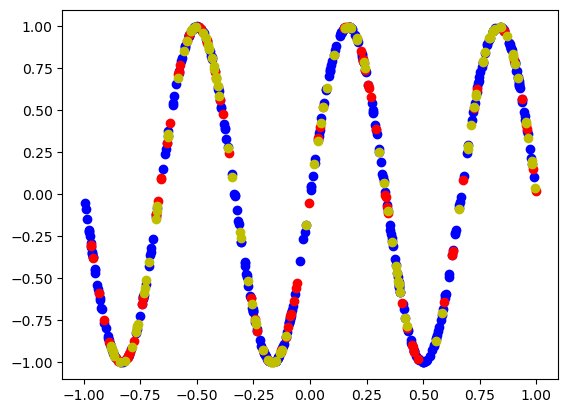

In [ ]:
plt.plot(X_train, y_train,'bo')
plt.plot(X_val, y_val,'ro')
plt.plot(X_test, y_test, 'yo')

In [ ]:
# Define the layer structure of the neural network
# Input layer which is actually the input of the 1-dim. real Sinus function
input_layer = layers.Input(shape=(1,))
# Hidden layer where the heavy lifting of the approximation of the Sinus function is performed.
# Note that hidden_layer uses the input_layer as input
hidden_layer1 = layers.Dense(8, activation='relu')(input_layer)
# Output layer which is the result of the 1-dim. real Sinus function.
# Note that output_layer uses the hidden_layer as input
output_layer = layers.Dense(1, activation='linear')(hidden_layer1)

In [ ]:
# Create the neural network model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model.summary()
model.layers

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
import tensorflow as tf
from tensorflow import keras
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

In [ ]:
# Fit model to training data with validation
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=4000, callbacks=[callback], verbose=0)

In [ ]:
# Evaluate model on test data
loss = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4754


In [ ]:
X_test.sort()

In [ ]:
# Generate test data of actual
# and predicted values for plotting
X_test.sort() #sort list since we picked them randomly
y_plot = polynomial(X_test)
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


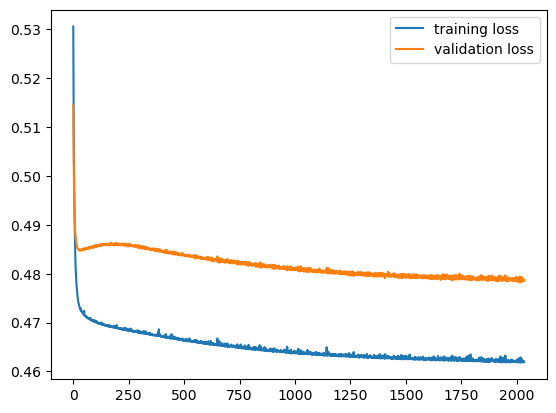

In [ ]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

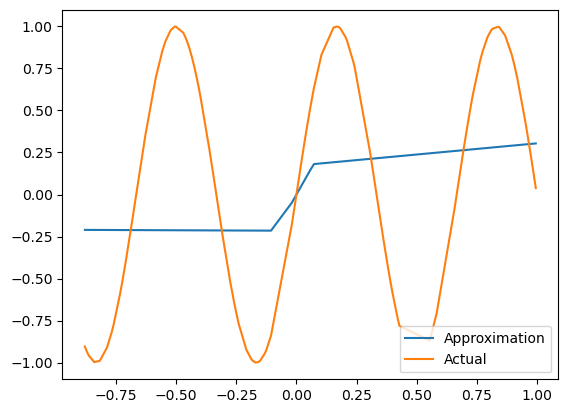

In [ ]:
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_plot, label='Actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_plot)**0.5

0.6894587184942044